In [2]:
import pandas as pd
houses = pd.read_csv('../Lianjia_project.csv', names= ['housecode', 'name', 'line', 'station', 'residential', 'area', 'type', 'houseArea',
            'orientation', 'decoration', 'floor', 'buildingTime', 'buildingType', 'follow',
            'unitPrice', 'totalPrice', 'tags', 'href', 'elevator', 'tradeProperty', 'farFromStation'])

In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73900 entries, 0 to 73899
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   housecode       73900 non-null  int64  
 1   name            73900 non-null  object 
 2   line            73900 non-null  object 
 3   station         73900 non-null  object 
 4   residential     73900 non-null  object 
 5   area            73900 non-null  object 
 6   type            73900 non-null  object 
 7   houseArea       73900 non-null  float64
 8   orientation     73900 non-null  object 
 9   decoration      73900 non-null  object 
 10  floor           73900 non-null  object 
 11  buildingTime    68269 non-null  float64
 12  buildingType    73900 non-null  object 
 13  follow          73900 non-null  int64  
 14  unitPrice       73900 non-null  float64
 15  totalPrice      73900 non-null  float64
 16  tags            73730 non-null  object 
 17  href            73900 non-null 

In [4]:
# 按housecode分组，查看重复值，因为一个地铁站可能分布在不同地铁线上，而且一个小区可能位于三个地铁三角区域内
groupbyed = houses[houses.duplicated('housecode')].groupby('housecode') 

In [5]:
# 按降序排列，发现重复值非常多，达到18362个
groupbyed.size().sort_values(ascending=False) 

housecode
106101874103    15
106101483165    15
106103765732    15
106102166392    15
106102738055    15
                ..
106103478084     1
106103478060     1
106103477946     1
106103477817     1
106103345720     1
Length: 18362, dtype: int64

In [6]:
# 查看重复值最多的第一个
groupby_max_count = dict(list(groupbyed))[(106101874103)]

In [7]:
# 发现housecode = 106101874103 这条数据在四个站都计算了，而且在都算在了离地铁站0-500,500-800的距离内，真实是距离太升南路419，骡马市898，文殊院1010，市二医院1434，数据严重不符
groupby_max_count

,housecode,name,line,station,residential,area,type,houseArea,orientation,decoration,...,buildingTime,buildingType,follow,unitPrice,totalPrice,tags,href,elevator,tradeProperty,farFromStation
751,106101874103,缤纷假日标间，朝东向带小阳台。,1号线(科学城-韦家碾),文殊院站,缤纷假日,太升路,1室0厅,46.87,东,简装,...,2004.0,板楼,2,11095.0,52.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106101874103...,2,1,2
1098,106101874103,缤纷假日标间，朝东向带小阳台。,1号线(科学城-韦家碾),骡马市站,缤纷假日,太升路,1室0厅,46.87,东,简装,...,2004.0,板楼,2,11095.0,52.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106101874103...,2,1,1
1278,106101874103,缤纷假日标间，朝东向带小阳台。,1号线(科学城-韦家碾),骡马市站,缤纷假日,太升路,1室0厅,46.87,东,简装,...,2004.0,板楼,2,11095.0,52.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106101874103...,2,1,2
7872,106101874103,缤纷假日标间，朝东向带小阳台。,1号线(五根松-韦家碾),文殊院站,缤纷假日,太升路,1室0厅,46.87,东,简装,...,2004.0,板楼,2,11095.0,52.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106101874103...,2,1,1
8074,106101874103,缤纷假日标间，朝东向带小阳台。,1号线(五根松-韦家碾),文殊院站,缤纷假日,太升路,1室0厅,46.87,东,简装,...,2004.0,板楼,2,11095.0,52.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106101874103...,2,1,2
8421,106101874103,缤纷假日标间，朝东向带小阳台。,1号线(五根松-韦家碾),骡马市站,缤纷假日,太升路,1室0厅,46.87,东,简装,...,2004.0,板楼,2,11095.0,52.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106101874103...,2,1,1
8601,106101874103,缤纷假日标间，朝东向带小阳台。,1号线(五根松-韦家碾),骡马市站,缤纷假日,太升路,1室0厅,46.87,东,简装,...,2004.0,板楼,2,11095.0,52.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106101874103...,2,1,2
32105,106101874103,缤纷假日标间，朝东向带小阳台。,3号线,市二医院站,缤纷假日,太升路,1室0厅,46.87,东,简装,...,2004.0,板楼,2,11095.0,52.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106101874103...,2,1,1
32333,106101874103,缤纷假日标间，朝东向带小阳台。,3号线,市二医院站,缤纷假日,太升路,1室0厅,46.87,东,简装,...,2004.0,板楼,2,11095.0,52.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106101874103...,2,1,2
41332,106101874103,缤纷假日标间，朝东向带小阳台。,4号线,市二医院站,缤纷假日,太升路,1室0厅,46.87,东,简装,...,2004.0,板楼,2,11095.0,52.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106101874103...,2,1,1


In [8]:
# 分组最小值, 发现真实距离石油大学站541，距离成都医学院635，爬取数据严重不符，所以决定重新爬取
groupby_min_count = dict(list(groupbyed))[(106103345720)]
groupby_min_count

,housecode,name,line,station,residential,area,type,houseArea,orientation,decoration,...,buildingTime,buildingType,follow,unitPrice,totalPrice,tags,href,elevator,tradeProperty,farFromStation
27253,106103345720,润扬北城1号 精装套三 地铁口,3号线,石油大学站,润扬北城1号,新都城区,3室2厅,78.99,南,精装,...,2013.0,塔楼,1,14559.0,115.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106103345720...,2,1,1


In [9]:
drop_duplicates_data = houses.drop_duplicates('housecode')

In [10]:
houses_by_station = drop_duplicates_data.groupby('station')

In [11]:
by_staion_count = houses_by_station.size().sort_values(ascending=False)

In [12]:
from pyecharts.charts import Bar
from pyecharts import options as opts 

In [13]:
# 数量分布图
count_bar = (Bar().add_xaxis(by_staion_count.index.tolist()[:10]).add_yaxis('数量',by_staion_count.values.tolist()[:10]))

In [14]:
count_bar.render_notebook()

In [15]:
# 均价分布图
by_mean = houses_by_station['unitPrice'].mean().sort_values(ascending=False)

In [16]:
mean_bar = (Bar().add_xaxis(by_mean.index.tolist()[:10]).add_yaxis('数量',by_mean.round(2).values.tolist()[:10]))
mean_bar.render_notebook()

In [17]:
by_type = drop_duplicates_data.groupby('type')

In [18]:
by_type_sort = by_type.size().sort_values(ascending=False)

In [19]:
type_bar = (Bar().add_xaxis(by_type_sort.index.tolist()[:10]).add_yaxis('户型',by_type_sort.round(2).values.tolist()[:10]))
type_bar.render_notebook()

In [20]:
by_type['type'].count().sort_values(ascending=False)

type
3室2厅    6828
2室1厅    6776
2室2厅    3982
3室1厅    3575
1室1厅    3133
4室2厅    1968
1室0厅     873
4室1厅     458
5室2厅     285
1室2厅     112
4室3厅      59
5室3厅      58
5室1厅      49
6室2厅      48
3室3厅      44
2室0厅      30
6室3厅      20
3室0厅      17
6室1厅      11
7室2厅       9
7室3厅       8
8室2厅       4
4室4厅       3
4室0厅       3
6室4厅       3
7室1厅       2
9室3厅       2
5室4厅       2
0室1厅       1
9室4厅       1
5室0厅       1
2室3厅       1
6室0厅       1
7室4厅       1
8室1厅       1
9室2厅       1
0室0厅       1
Name: type, dtype: int64

In [24]:
drop_duplicates_data['unitPrice'].groupby(drop_duplicates_data['type']).mean()

type
0室0厅     9961.000000
0室1厅     9970.000000
1室0厅    15826.581901
1室1厅    16974.282158
1室2厅    18813.982143
2室0厅    17073.633333
2室1厅    17075.877804
2室2厅    16969.868157
2室3厅    18161.000000
3室0厅    18306.000000
3室1厅    17934.843916
3室2厅    17608.749707
3室3厅    17370.295455
4室0厅    16916.000000
4室1厅    20151.978166
4室2厅    19714.914126
4室3厅    19224.338983
4室4厅    27750.000000
5室0厅    13128.000000
5室1厅    22591.897959
5室2厅    22231.522807
5室3厅    22639.413793
5室4厅    17570.000000
6室0厅    17316.000000
6室1厅    18504.727273
6室2厅    21843.937500
6室3厅    18902.600000
6室4厅    19794.000000
7室1厅    11948.000000
7室2厅    15806.555556
7室3厅    26939.000000
7室4厅    19802.000000
8室1厅    29416.000000
8室2厅    20032.750000
9室2厅    12191.000000
9室3厅    27345.500000
9室4厅    63905.000000
Name: unitPrice, dtype: float64

In [37]:
dict(list(drop_duplicates_data.groupby('type')))['9室4厅']

,housecode,name,line,station,residential,area,type,houseArea,orientation,decoration,...,buildingTime,buildingType,follow,unitPrice,totalPrice,tags,href,elevator,tradeProperty,farFromStation
4216,106101113433,誉峰二期顶楼跃层带花园，对小区中庭,1号线(科学城-韦家碾),金融城站,誉峰二期,金融城,9室4厅,297.32,东北,精装,...,2014.0,板楼,5,63905.0,1900.0,subway:近地铁;five:房本满两年,https://cd.lianjia.com/ershoufang/106101113433...,2,1,2


In [38]:
dict(list(drop_duplicates_data.groupby('type')))['0室0厅']

,housecode,name,line,station,residential,area,type,houseArea,orientation,decoration,...,buildingTime,buildingType,follow,unitPrice,totalPrice,tags,href,elevator,tradeProperty,farFromStation
49100,106104069739,德坤新天地 --室--厅 106万,4号线,光华公园站,德坤新天地,珠江新城,0室0厅,106.42,南,其他,...,NaN,塔楼,0,9961.0,106.0,subway:近地铁,https://cd.lianjia.com/ershoufang/106104069739...,2,1,2


In [39]:
drop_duplicates_data['type'].value_counts()

3室2厅    6828
2室1厅    6776
2室2厅    3982
3室1厅    3575
1室1厅    3133
4室2厅    1968
1室0厅     873
4室1厅     458
5室2厅     285
1室2厅     112
4室3厅      59
5室3厅      58
5室1厅      49
6室2厅      48
3室3厅      44
2室0厅      30
6室3厅      20
3室0厅      17
6室1厅      11
7室2厅       9
7室3厅       8
8室2厅       4
4室4厅       3
4室0厅       3
6室4厅       3
5室4厅       2
7室1厅       2
9室3厅       2
0室0厅       1
2室3厅       1
8室1厅       1
6室0厅       1
7室4厅       1
9室4厅       1
0室1厅       1
9室2厅       1
5室0厅       1
Name: type, dtype: int64

In [43]:
drop_duplicates_data.sort_values(['follow'], ascending=False).head()

,housecode,name,line,station,residential,area,type,houseArea,orientation,decoration,...,buildingTime,buildingType,follow,unitPrice,totalPrice,tags,href,elevator,tradeProperty,farFromStation
52903,106104104127,全兴花园电梯套四户型 房子户型方正,5号线,北站西二路站,全兴花园,沙湾,4室2厅,154.09,东,其他,...,2002.0,板塔结合,9,14018.0,216.0,subway:近地铁;vr:VR房源;haskey:随时看房,https://cd.lianjia.com/ershoufang/106104104127...,2,1,1
31703,106104036648,世茂玉锦湾带超大平台清水套四出售,3号线,红星桥站,世茂玉锦湾二期,猛追湾,4室2厅,186.00,西南,毛坯,...,2015.0,板楼,9,30000.0,558.0,subway:近地铁;haskey:随时看房,https://cd.lianjia.com/ershoufang/106104036648...,2,1,2
57894,106102585532,高新南区 标准套二 户型方正,5号线,九兴大道站,梧桐苑,神仙树,2室1厅,61.38,南 北,简装,...,2000.0,板楼,9,15152.0,93.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106102585532...,1,1,2
57887,106102817847,高新南 方正套二 可上屋顶,5号线,九兴大道站,梧桐苑,神仙树,2室2厅,74.00,东南,简装,...,2000.0,板楼,9,14190.0,105.0,subway:近地铁;vr:VR房源;taxfree:房本满五年,https://cd.lianjia.com/ershoufang/106102817847...,1,1,2
47635,106102894352,精装修 中间楼层 带车位 房东诚心出售,4号线,中坝站,中铁瑞景颐城,外光华,3室1厅,80.11,东北,精装,...,2013.0,板楼,9,24217.0,194.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106102894352...,2,1,2


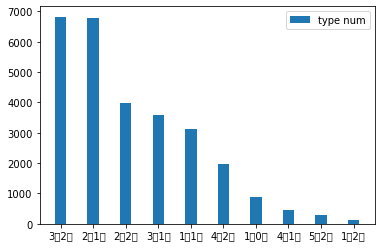

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(by_type_sort.index.tolist()[:10], by_type_sort.round(2).values.tolist()[:10], 0.35, label='type num' )
ax.legend()
plt.show()

(array([0.00044669, 0.0001489 , 0.0001489 , 0.        , 0.0001489 ,
        0.0002978 , 0.        , 0.        , 0.        , 0.0002978 ]),
 array([ 112. ,  783.6, 1455.2, 2126.8, 2798.4, 3470. , 4141.6, 4813.2,
        5484.8, 6156.4, 6828. ]),
 <a list of 10 Patch objects>)

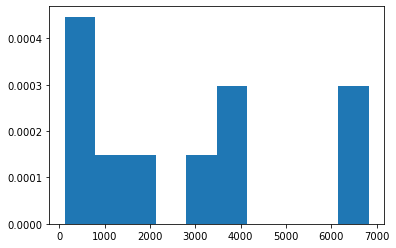

In [48]:
fig, ax = plt.subplots()
ax.hist(by_type_sort.round(2).values.tolist()[:10], 10, density=1)

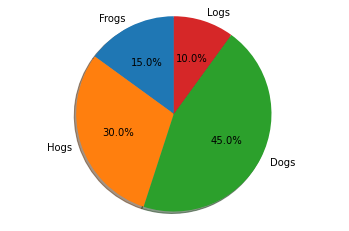

In [52]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()